In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
players = ['Braun', 'Bruce', 'Bryant', 'Cancar', 'Gordon', 'Green', 'Jackson', 'Jokic', 'KCP', 'MPJ', 'Murray', 'Nnaji', 'Opponent', 'Watson']

player_dicts = {}

for player in players:
    
     player_dicts[player] = {}

In [3]:
wins = ['3.16.23Pistons', '3.19.23Nets', '3.22.23Wizards', '3.25.23Bucks', '3.27.23Sixers', '4.02.23Warriors']
losses = ['3.14.23Raptors', '3.18.23Knicks', '3.30.23Pelicans', '4.04.23Rockets']
games = losses + wins

for player in player_dicts:

    for game in games:

        try:
            file = f'{player}/PPP Stats/{game}.csv'
            game_df = pd.read_csv(file, index_col=0)
            
            player_dicts[player][game] = game_df
            
        except(FileNotFoundError):
            pass

In [4]:
def make_game_dict(df):

    names = list(df.index)
    game_dict = {}
    for index, row in df.iterrows():
        row_dict = {}
        for col_name, value in row.items():
            row_dict[col_name] = value
        game_dict[index] = row_dict
        
    return game_dict

In [5]:
player_game_dicts = {}

for player in player_dicts:
    
    player_game_dicts[player] = {}
    
    for k,v in player_dicts[player].items():
        
        player_game_dicts[player][k] = make_game_dict(v)

In [24]:
def make_boxplots3(data, row, win_loss=False):

    columns = ['Total PPP', '% of Poss.', 'Total TO','Total FG%',
               'Shooting PPP','% of Shooting Poss.','Shooting FG%','Shooting 2pt Att.','Shooting 2pt FG%','Shooting 3pt Att.','Shooting 3pt FG%',
               'Passing PPP','% of Passing Poss.','Passing FG%','Passing 2pt Att.','Passing 2pt FG%','Passing 3pt Att.','Passing 3pt FG%']
    
    rows = ['PNR Ball Handler','PNR Screener','DHO Ball Handler','DHO Screener','DBL Ball Handler','DBL Screener','ISOLATION','TRANSITION','Attacking Closeouts','Catch & Shoot','Off Ball Screens','Cutting','Off. Rebounds','TOTAL']
    
    ''' Seperate values by wins and losses '''
    
    selected_col = columns
    selected_row = [row]
    
    win_loss_dict = {}
    data_dict = {}
   
    for row in selected_row:
        
        data_dict[row] = {}
        win_loss_dict[row] = {}
        

        for col in selected_col:

            data_dict[row][col] = []
            win_loss_dict[row][col] = [[],[]] 
    
    for k,v in data.items():
        for row in selected_row:
            for col in selected_col:

                data_dict[row][col].append(data[k][row][col])

                if k in wins:
                    values = data[k][row][col]
                    win_loss_dict[row][col][0].append(values)

                if k in losses:
                    values = data[k][row][col]
                    win_loss_dict[row][col][1].append(values)
    
    
    if win_loss == False:
        
        labels = ['Wins', 'Losses']
        colors = ['lavender', 'lightgreen', 'pink']
        outlierprops = dict(marker='o', markerfacecolor='violet', markersize=10)
        meanpointprops = dict(marker='D', markeredgecolor='black',
                              markerfacecolor='violet', markersize=15)


        # Create subplots for each key in the dataset
        fig, axs = plt.subplots(len(data_dict.keys()), len(columns), figsize=(40,25))
        gs = gridspec.GridSpec(2,9)

        for i, key in enumerate(data_dict.keys()):

            for j, col in enumerate(columns):

                c=j

                if c <= 8:
                    r = 0

                elif c == 9:
                    c=0
                    r=1

                else:
                    r = 1
                    c = (c%10) + 1

                data_dict[key][col]  = [x for x in data_dict[key][col] if not math.isnan(x)]

                mean_total = round((sum(data_dict[key][col]))/len(data_dict[key][col]), 2)

                axs[j] = plt.subplot(gs[r,c])

                bplot = axs[j].boxplot(data_dict[key][col],
                                       showmeans=True, meanline=False, meanprops=meanpointprops,
                                       flierprops=outlierprops,
                                       patch_artist=True,
                                       widths=0.2
                                       )

                for patch, color in zip(bplot['boxes'], colors):
                    patch.set_facecolor(color)

                for median in bplot['medians']:
                    median.set_color('black')

                axs[j].text(1.16, mean_total, f"Mean\n {mean_total}", fontsize=20, bbox=dict(facecolor='azure', edgecolor='black'))
                axs[j].set_title(col, fontsize=24)
                axs[j].yaxis.grid(True)
                axs[j].tick_params(axis='both', which='major', labelsize=15)

        plt.savefig('test.png', transparent=False)        
        plt.show()
        
    if win_loss == True:
        
        labels = ['Wins', 'Losses']
        colors = ['lightgreen', 'salmon']
        outlierprops = dict(marker='o', markerfacecolor='violet', markersize=10)
        meanpointprops = dict(marker='D', markeredgecolor='black',
                              markerfacecolor='darkblue', markersize=15)


        # Create subplots for each key in the dataset
        fig, axs = plt.subplots(len(win_loss_dict.keys()), len(columns), figsize=(40,23))
        gs = gridspec.GridSpec(2,9)

        for i, key in enumerate(win_loss_dict.keys()):

            for j, col in enumerate(columns):

                c=j

                if c <= 8:
                    r = 0

                elif c == 9:
                    c=0
                    r=1

                else:
                    r = 1
                    c = (c%10) + 1

                win_loss_dict[key][col][0]  = [x for x in win_loss_dict[key][col][0] if not math.isnan(x)]
                win_loss_dict[key][col][1]  = [x for x in win_loss_dict[key][col][1] if not math.isnan(x)]
                
                mean_total_wins = round((sum(win_loss_dict[key][col][0]))/len(win_loss_dict[key][col][0]), 2)
                mean_total_loss = round((sum(win_loss_dict[key][col][1]))/len(win_loss_dict[key][col][1]), 2)
                
                axs[j] = plt.subplot(gs[r,c])

                bplot = axs[j].boxplot(win_loss_dict[key][col],
                                       showmeans=True, meanline=False, meanprops=meanpointprops,
                                       flierprops=outlierprops,
                                       patch_artist=True,
                                       widths=0.4,
                                       labels=labels
                                       )

                for patch, color in zip(bplot['boxes'], colors):
                    patch.set_facecolor(color)

                for median in bplot['medians']:
                    median.set_color('black')

                axs[j].text(1.1, (mean_total_wins + (0.06 * mean_total_wins)), f"Avg:\n{mean_total_wins}", fontsize=16, bbox=dict(facecolor='azure', edgecolor='black'))
                axs[j].text(2.1, (mean_total_loss + (0.06 * mean_total_loss)), f"Avg:\n{mean_total_loss}", fontsize=16, bbox=dict(facecolor='azure', edgecolor='black'))
                
                axs[j].set_title(col, fontsize=24)
                axs[j].yaxis.grid(True)
                axs[j].tick_params(axis='both', which='major', labelsize=15)

        plt.savefig('win_loss_test.png', transparent=False)        
        plt.show() 
    
    return

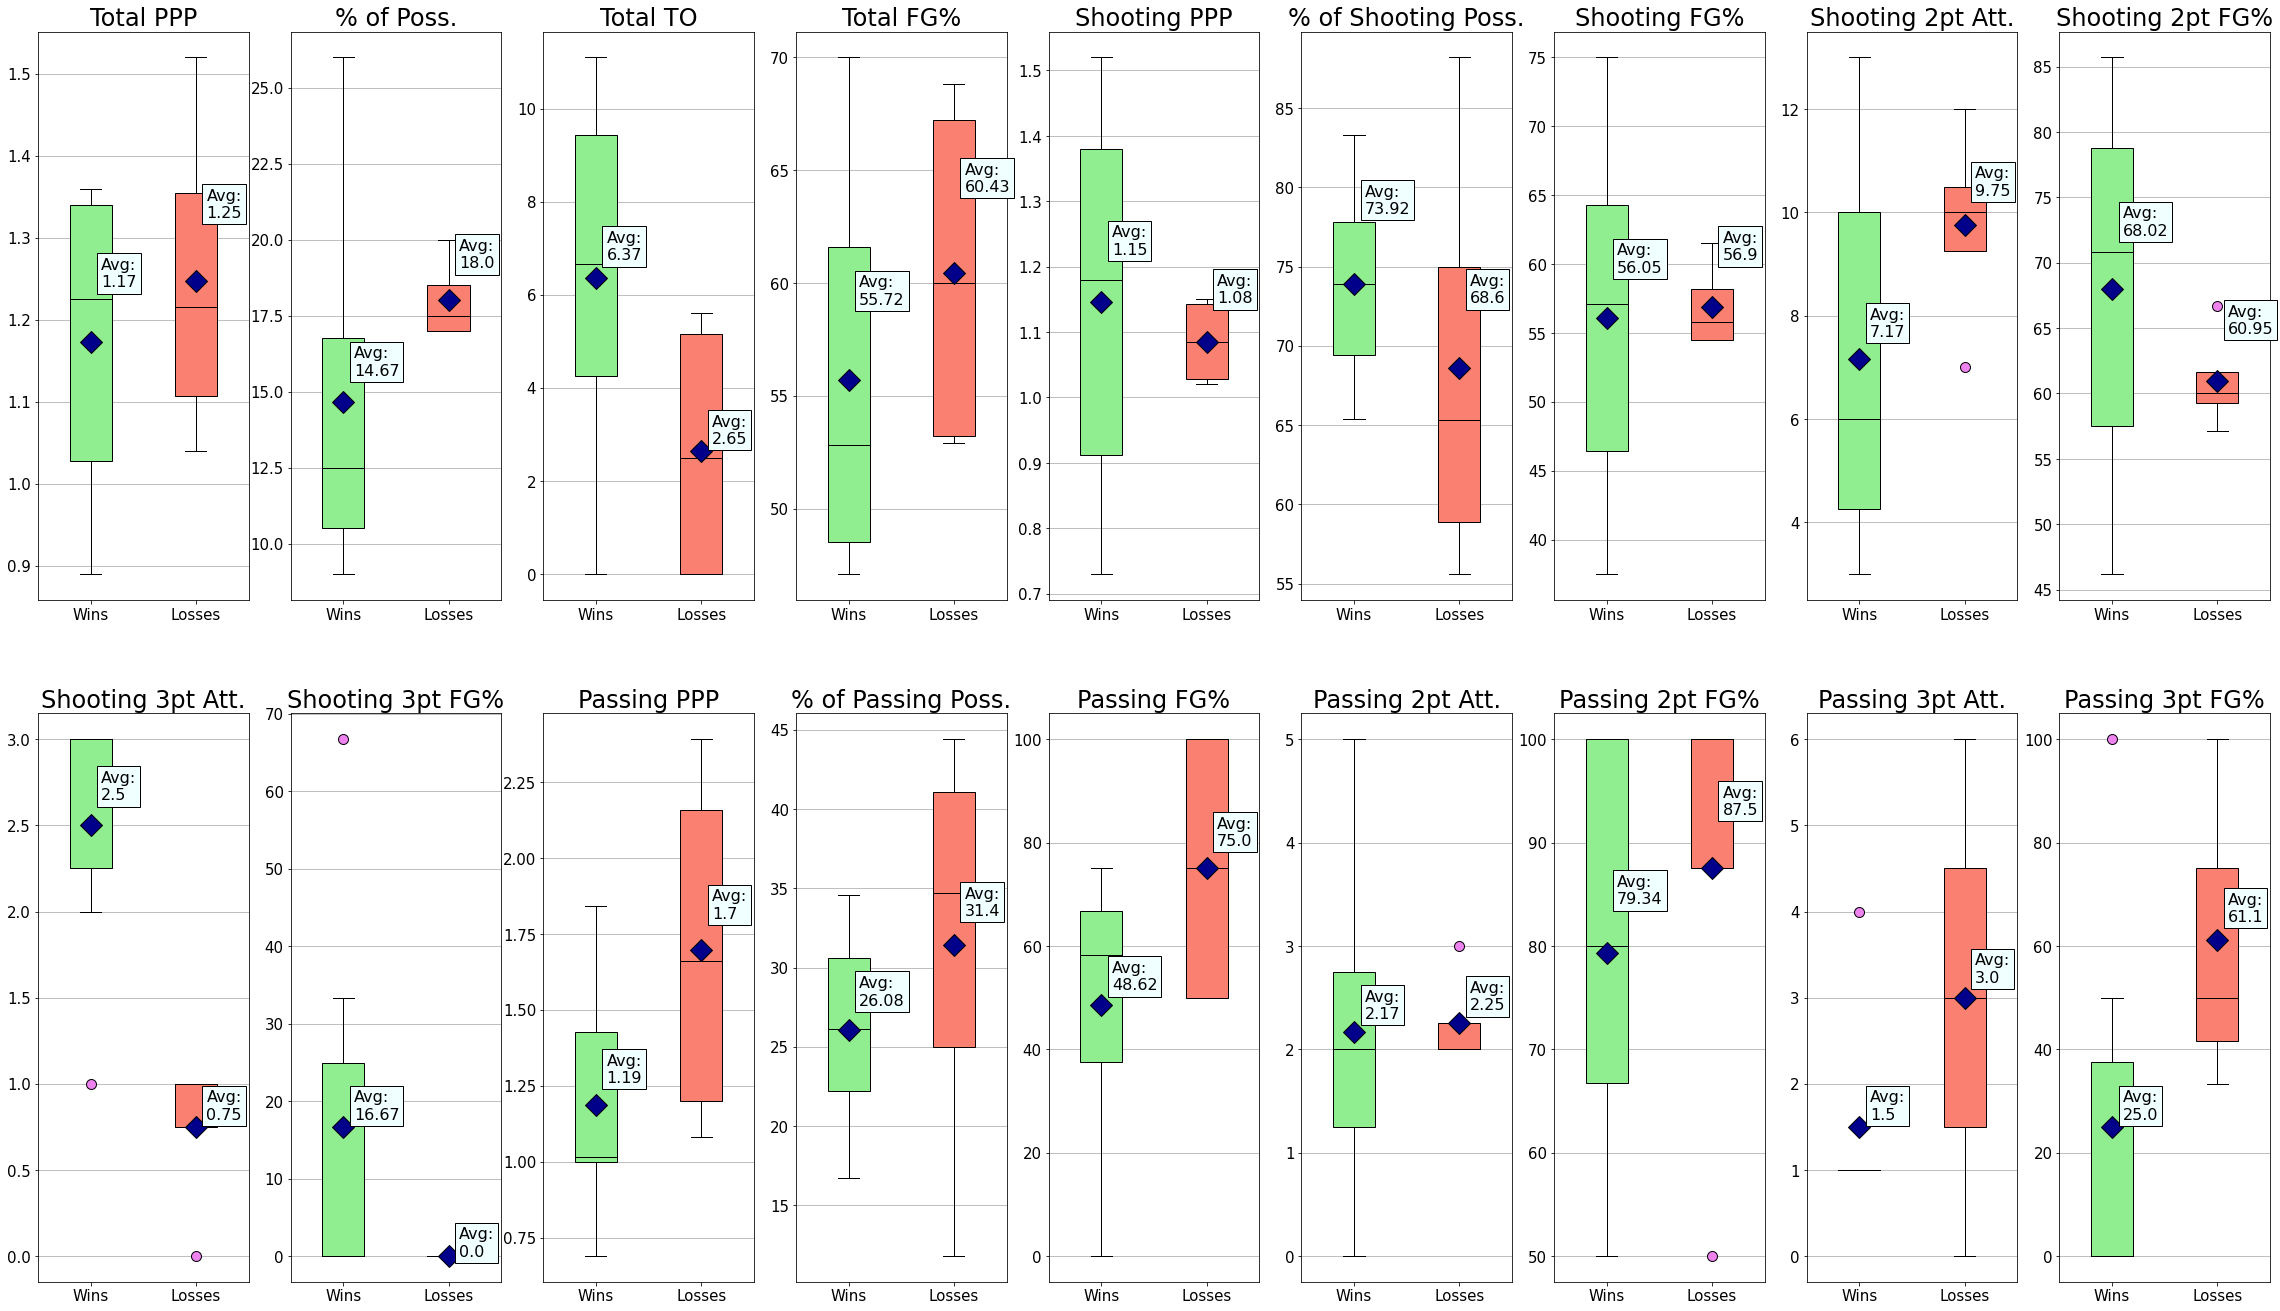

In [25]:
make_boxplots3(player_game_dicts['Gordon'], 'TOTAL', win_loss=True)